<a href="https://colab.research.google.com/github/GHOOST-X/Image-Recognition-using-TensorFlow/blob/main/Image_Recognition_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Recognition using TensorFlow**

Image recognition is a task where a model identifies objects in an image and assigns labels to them. For example a model can be trained to identify difference between different types of flowers, animals or traffic signs. In this article, we will use Tensorflow and Keras to build a simple image recognition model.

**Implementation of Image Recognition**
Lets see various steps involved in its implementation:

**Step 1: Importing TensorFlow and Other Libraries**

Here we will be using Matplotlib, NumPy, TensorFlow, Keras and PIL libraries.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Step 2: Loading image datasets**

We will be using flower dataset which contains 3,670 images with five classes labeled as daisy, dandelion, roses, sunflowers and tulips. Here, pathlib library is used to handle the path names of the downloaded image file.

**1.data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True):** Downloads dataset from the provided URL (origin=dataset_url) and extracts it (untar=True) returning the path where the dataset is stored.

**2.data_dir = pathlib.Path(data_dir)**:Converts directory path (data_dir) into a Path object to allow easier manipulation and operations with file paths.

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
data_dir = data_dir / "flower_photos"
if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Dataset directory not found at: {data_dir}")

**Output:**
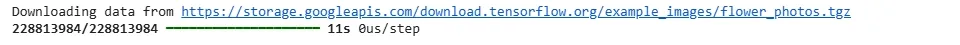

Now after downloading it, we can count total images by using len() method. Here glob() method is used to find jpg files in the specified directory.

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f"Total images found: {image_count}")
if image_count == 0:
    print("Warning: No images found. Check your dataset path and format.")
    all_files = list(data_dir.glob('*/*'))
    print(f"Found files (first 5): {[str(f) for f in all_files[:5]]}")

Total images found: 3670


**Output:**
 Total images found: 3670

Lets see some sample rose image from the dataset. Here we will find and list all files inside roses folder in the dataset directory.

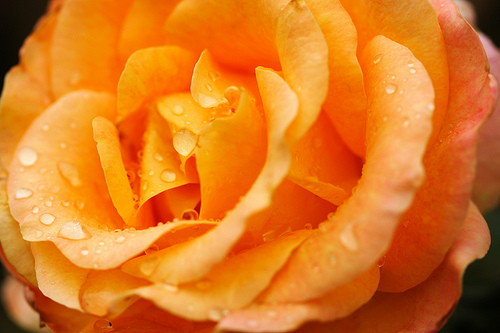

In [ ]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

**Step 3: Creating a model**

Working with images we need to load the images using tf.keras.utils.image_dataset_from_directory function. We will split the dataset into 80% training and 20% validation datasets.

**Training Split:** Data on which the model trains on.

* ** seed=123,image_size=(180, 180), batch_size=32):** Sets a fixed random seed, target size and batch size respectively.




In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
	data_dir,
	validation_split=0.2,
	subset="training",
	seed=123,
	image_size=(180, 180),
	batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


**Output:**

**Found 3670 files belonging to 5 classes.**

**Using 2936 files for training.**

**Validation Split:** Data on which the model gets validated.

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
	data_dir,
	validation_split=0.2,
	subset="validation",
	seed=123,
	image_size=(180,180),
	batch_size=32)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


**Output:**

**Found 3670 files belonging to 5 classes.**

**Using 734 files for validation.**

We can check class names by calling the class_names function on the training dataset in alphabetical order.

In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


**Output:**

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

**Step 4: Visualizing the Datasets**

Before training the model let’s visualize some images from the training dataset using matplotlib. This will help us understand how the dataset looks. We can view 25 images from training dataset.


* **ax = plt.subplot(5, 5, i + 1):** Adds a subplot at the specified position in the 5x5 grid.



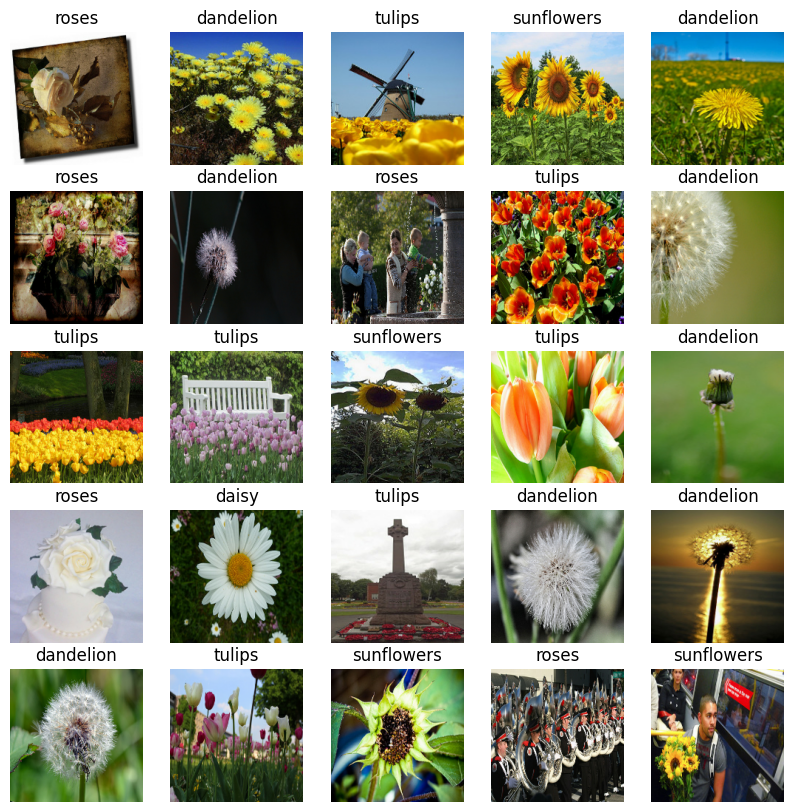

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
	for i in range(25):
		ax = plt.subplot(5, 5, i + 1)
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title(class_names[labels[i]])
		plt.axis("off")

**Step 5: Building the Model**

Here we design CNN (Convolutional Neural Network) model using Keras Sequential() model which is commonly used model. We will use three convolution layers with Conv2D and MaxPooling2D followed by a dense layer to classify images.


*   **layers.Rescaling(1./255, input_shape=(180,180, 3)):** Rescales images to [0,1] and sets input image size.

*   **layers.Conv2D(16, 3, padding='same', activation='relu'):** Adds a convolutional layer with 16 filters and ReLU activation.


*   **layers.MaxPooling2D():** Adds a max-pooling layer to down sample feature maps.



In [ ]:
num_classes = len(class_names)
model = Sequential([
	layers.Rescaling(1./255, input_shape=(180,180, 3)),
	layers.Conv2D(16, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Conv2D(32, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Conv2D(64, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Flatten(),
	layers.Dense(128, activation='relu'),
	layers.Dense(num_classes)
])

**Step 6: Compiling the Model**

Now we compile model with the Adam optimizer and sparse categorical cross-entropy loss function. This allows us to evaluate performance of the model in terms of accuracy.

In [ ]:
model.compile(optimizer='adam',
			loss=tf.keras.losses.SparseCategoricalCrossentropy(
				from_logits=True),
			metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

**Step 7: Training the Model**

We can now train model using the model.fit() function. We will use the training and validation datasets and train model for 10 epochs.

In [ ]:
epochs=10
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.3335 - loss: 1.4922 - val_accuracy: 0.5109 - val_loss: 1.1126
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.5952 - loss: 1.0312 - val_accuracy: 0.5967 - val_loss: 1.0309
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.6799 - loss: 0.8462 - val_accuracy: 0.6308 - val_loss: 0.9558
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.7526 - loss: 0.6631 - val_accuracy: 0.6035 - val_loss: 1.0478
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.8249 - loss: 0.4788 - val_accuracy: 0.6376 - val_loss: 1.1263
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8994 - loss: 0.2797 - val_accuracy: 0.6580 - val_loss: 1.2630
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.9450 - loss: 0.1646 - val_accuracy: 0.6158 - val_loss: 1.5919
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 125s 1s/step - accuracy: 0.9608 - loss: 0.1140 - val_accuracy: 0.6444 - v

With each epoch, accuracy is changed.

**Step 8: Visualizing Training Results**

Creating plots of accuracy and loss on the training and validation sets to consider bias and variance.


*   **acc = history.history['accuracy']:** Stores training accuracy from each epoch in the acc variable.

*   **val_acc = history.history['val_accuracy']:** Stores validation accuracy from each epoch in the val_acc variable



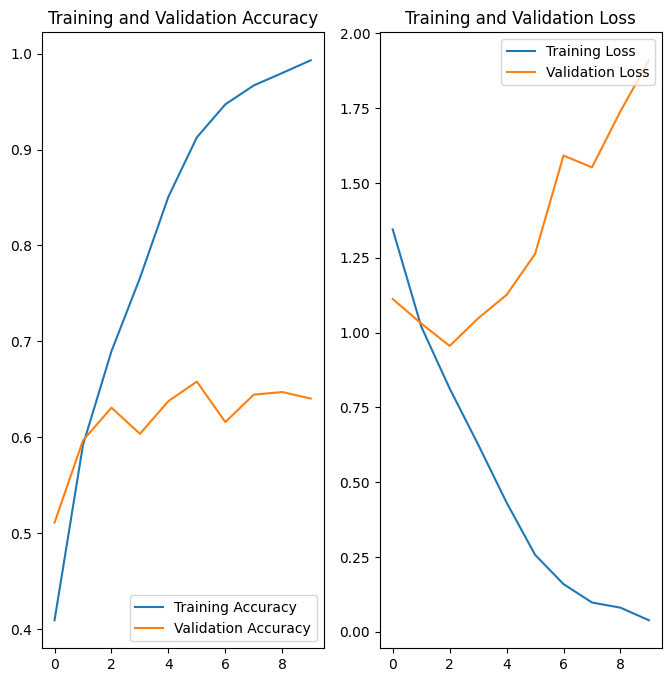

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

By following these steps, we’ve learned how to classify images into categories easily. With this we can understand the important concepts of image recognition.